### Quick Navigation
- <a href=#1>Initial exploration and cleaning</a>
- <a href=#report>Quality report</a>
- <a href=#2>Quality plan</a>
- <a href=#3>Relationships between data</a>

In [61]:
# Imports
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

# 1. Data Understanding: Data Quality Report
<a name='1'></a>

## 1.1 Get Data

In [62]:
# Import data from CSV file into data frame
df = pd.read_csv('CustomerChurn-1437330.csv')

## 1.2 Initial Exploration and Cleaning

### Overview of data frame

In [63]:
# Number of rows and columns
print('Number of rows: {}\nNumber of columns: {}'.format(df.shape[0], df.shape[1]))

Number of rows: 1000
Number of columns: 33


In [64]:
# Show first 20 rows
# homework note: I found this more informative than head(5); same goes for tail(5)
df.head(5)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
0,1029178,56,,,no,false,6,1,684,true,...,0.00,1.534000,-5.800300,2.00,23,0.00,0,0,0,false
1,1066490,58,professional,,yes,false,6,1,345,true,...,15.33,2.888239,-3.171997,18.67,11,1.00,0,0,0,true
2,1050736,0,,,unknown,false,0,1,493,true,...,14.00,0.813333,-7.493694,3.67,17,3.33,0,0,0,false
3,1060762,26,,,no,false,4,3,122,true,...,4.00,0.732926,-3.750551,6.67,12,0.33,0,0,0,true
4,1084909,52,,suburban,yes,false,9,1,256,true,...,25.67,0.876904,9.809992,10.00,8,6.33,0,0,0,true


In [65]:
# Show last 20 rows
df.tail(5)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
995,1084819,36,,,unknown,false,7,1,195,true,...,13.00,3.171844,16.875410,12.33,6,0.67,0,0,0,false
996,1045111,0,,,unknown,false,0,2,-4,false,...,15.33,1.354581,4.531915,28.67,20,1.33,0,0,3,false
997,1066277,64,,s,yes,false,9,1,346,true,...,0.00,0.000000,-9.929360,0.00,11,0.00,0,0,0,true
998,1039318,66,,,yes,false,7,1,601,true,...,0.00,1.726410,-8.762209,30.67,20,2.67,0,0,0,false
999,1097824,60,,,no,false,5,7,161,true,...,0.00,0.000000,-2.585687,0.00,59,0.00,0,0,0,false


## Fix representation of missing values (white space issue)

Missing values are being correctly handled as NaN. Looking at the csv file, we see that these are being represented by spaces rather than empty strings. Also some column names are preceded by spaces which will cause confusion when addressing them in code.

Thus, the csv needs be reloaded with the skipinitialspace parameter set to True, so that these spaces are removed and the above issues are fixed.

In [66]:
# Reload csv accounting for white spaces after commas
df = pd.read_csv('CustomerChurn-1437330.csv', skipinitialspace=True)

# Save new stripped csv
df.to_csv('CustomerChurn-1437330_stripped.csv', index=False)

In [67]:
# Check result
df.head(20)

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
0,1029178,56,NaN,NaN,no,False,6,1,684,True,...,0.00,1.534000,-5.800300,2.00,23,0.00,0,0,0,False
1,1066490,58,professional,NaN,yes,False,6,1,345,True,...,15.33,2.888239,-3.171997,18.67,11,1.00,0,0,0,True
2,1050736,0,NaN,NaN,unknown,False,0,1,493,True,...,14.00,0.813333,-7.493694,3.67,17,3.33,0,0,0,False
3,1060762,26,NaN,NaN,no,False,4,3,122,True,...,4.00,0.732926,-3.750551,6.67,12,0.33,0,0,0,True
4,1084909,52,NaN,suburban,yes,False,9,1,256,True,...,25.67,0.876904,9.809992,10.00,8,6.33,0,0,0,True
5,1067246,0,NaN,suburban,unknown,False,0,1,385,True,...,0.00,0.000000,-7.373076,0.00,13,0.00,0,0,0,True
6,1000959,40,NaN,suburban,yes,False,9,6,341,True,...,51.00,4.086220,-4.163124,74.67,45,1.00,0,0,0,False
7,1032636,54,NaN,suburban,yes,False,9,1,626,False,...,0.33,2.414827,1.419037,10.00,21,5.33,0,0,0,True
8,1013822,32,NaN,NaN,yes,False,8,2,335,True,...,0.00,0.000000,6.733636,0.00,27,0.00,1,0,0,False
9,1039826,0,NaN,suburban,unknown,False,0,2,385,True,...,3.33,8.387223,-5.314157,2.00,22,0.00,0,0,0,False


### Look at data properties

In [68]:
# Show data properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
customer                      1000 non-null int64
age                           1000 non-null int64
occupation                    233 non-null object
regionType                    501 non-null object
marriageStatus                1000 non-null object
children                      1000 non-null bool
income                        1000 non-null int64
numHandsets                   1000 non-null int64
handsetAge                    1000 non-null int64
smartPhone                    1000 non-null bool
currentHandsetPrice           1000 non-null float64
creditRating                  1000 non-null object
homeOwner                     1000 non-null bool
creditCard                    1000 non-null object
avgBill                       1000 non-null float64
avgMins                       1000 non-null float64
avgrecurringCharge            1000 non-null float64
avgOverBundleMins             1000 n

### Duplicate rows?

In [69]:
# Check for duplicate rows
df.duplicated()[df.duplicated() == True].shape[0]

0

### Quantify missing data

In [70]:
#Missing data for all features
nullsum = df.isnull().sum()

# % missing data for all features
nullpercent = (nullsum / df.shape[0]) * 100
nullpercent

customer                       0.0
age                            0.0
occupation                    76.7
regionType                    49.9
marriageStatus                 0.0
children                       0.0
income                         0.0
numHandsets                    0.0
handsetAge                     0.0
smartPhone                     0.0
currentHandsetPrice            0.0
creditRating                   0.0
homeOwner                      0.0
creditCard                     0.0
avgBill                        0.0
avgMins                        0.0
avgrecurringCharge             0.0
avgOverBundleMins              0.0
avgRoamCalls                   0.0
callMinutesChangePct           0.0
billAmountChangePct            0.0
avgReceivedMins                0.0
avgOutCalls                    0.0
avgInCalls                     0.0
peakOffPeakRatio               0.0
peakOffPeakRatioChangePct      0.0
avgDroppedCalls                0.0
lifeTime                       0.0
lastMonthCustomerCar

### Incorrectly typed missing data

Check for values that represent missing but not covered by default read_csv filter, such as 'unknown', 'blank', 'empty', '#DIV/0!' or possibly zero in some cases. 'unknown' occurs in at least oneConvert these to NaN where appropriate.

#### Replace synonyms of null/NaN

In [71]:
df.replace(['unknown', 'blank', 'empty', '#DIV/0!'], np.nan, inplace=True)

#### Investigate if age = 0 corrsponds to null

Many records have ages of 0: these are likely to be unknown/missing values, but they could perhaps representative of those under a legal threshold such as 18 or 16. Checking how many of these customers are retirees, students and homeowners, and whether they have children may allow us to effectively rule out this possibility.

In [72]:
# Investigate if age = 0 represents <18 or null
columns = ['age', 'occupation', 'homeOwner', 'children']
df_age0 = df[columns][df[columns]['age']==0]
print('Fraction of zero-age people who are retired:', df_age0[df_age0['occupation']=='retired'].shape[0] / df_age0.shape[0])
print('Fraction of zero-age people who are students:', df_age0[df_age0['occupation']=='student'].shape[0] / df_age0.shape[0])
print('Fraction of zero-age people who are home owners:', df_age0[df_age0['homeOwner']==True].shape[0] / df_age0.shape[0])
print('Fraction of zero-age people who have children:', df_age0[df_age0['children']==True].shape[0] / df_age0.shape[0])

Fraction of zero-age people who are retired: 0.0
Fraction of zero-age people who are students: 0.0
Fraction of zero-age people who are home owners: 0.8734177215189873
Fraction of zero-age people who have children: 0.012658227848101266


**Conclusion:** Null since 87% of those of age 0 are home owners, so replace with NaN

In [73]:
# Replace age 0 with NaN
df['age'].replace(0, np.nan, inplace=True)

#### Investigate if income = 0 corrsponds to null

Many records have incomes of 0: these could represent the lowest level on the income scale used or they could indicate unknown/missing values. Briefly examining how zero income relates to occupation and homeownership could shed some light.

In [74]:
income_0 = df[df['income']==0]
print('Percentage of 0 values for income:', 100 * income_0.shape[0] / df.shape[0])
print('Number of non-null values for occupation:', income_0['occupation'].count())
print('Percentage of home owners with income of 0:', 100 * income_0[income_0['homeOwner']==True].shape[0] / df[df['homeOwner']==True].shape[0])

Percentage of 0 values for income: 28.4
Number of non-null values for occupation: 0
Percentage of home owners with income of 0: 76.08695652173913


**Conclusion:** All zero incomes correspond to a missing value for occupation and 76% of them are homeowners (many homeowners could be retired and be considered to have no income, but this seems much too high). In addtion, there is a large percentage of missing data most of the other general demographic information, so it seems very unlikely that income data would be uniquely complete. Taken together, I think the evidence is strong enough to assume that 0 should be converted to NaN for income.

In [75]:
# Replace income 0 with NaN

df['income'].replace(0, np.nan, inplace=True)

#### Check if negative numbers are appropriate

In [76]:
# Find features with negative values
df.min()

customer                      1000022
age                                18
children                        False
income                              1
numHandsets                         1
handsetAge                         -4
smartPhone                      False
currentHandsetPrice                 0
creditRating                        A
homeOwner                       False
creditCard                          f
avgBill                             0
avgMins                             0
avgrecurringCharge                  0
avgOverBundleMins                   0
avgRoamCalls                        0
callMinutesChangePct          -30.155
billAmountChangePct           -4.8886
avgReceivedMins                     0
avgOutCalls                         0
avgInCalls                          0
peakOffPeakRatio                    0
peakOffPeakRatioChangePct     -32.479
avgDroppedCalls                     0
lifeTime                            6
lastMonthCustomerCareCalls          0
numRetention

In [77]:
# handsetAge is only problematic negative feature ('change' features can be negative)
df[df['handsetAge']<0]

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
159,1004135,46.0,self-employed,NaN,yes,True,6.0,5,-3,True,...,14.67,2.597189,2.029867,14.33,40,3.33,0,0,0,False
996,1045111,NaN,NaN,NaN,NaN,False,NaN,2,-4,False,...,15.33,1.354581,4.531915,28.67,20,1.33,0,0,3,False


In [78]:
# Only two (of 1000) values are negative and occur in otherwise normal looking records
# So convert to NaN
df['handsetAge'].replace([-3, -4], np.nan, inplace=True)

#### Re-quantify missing data

In [79]:
#Missing data for all features
nullsum = df.isnull().sum()

# % missing data for all features
nullpercent = (nullsum / df.shape[0]) * 100
nullpercent

customer                       0.0
age                           31.6
occupation                    76.7
regionType                    50.8
marriageStatus                40.7
children                       0.0
income                        28.4
numHandsets                    0.0
handsetAge                     0.2
smartPhone                     0.0
currentHandsetPrice            0.0
creditRating                   0.0
homeOwner                      0.0
creditCard                     0.0
avgBill                        0.0
avgMins                        0.0
avgrecurringCharge             0.0
avgOverBundleMins              0.0
avgRoamCalls                   0.0
callMinutesChangePct           0.0
billAmountChangePct            0.0
avgReceivedMins                0.0
avgOutCalls                    0.0
avgInCalls                     0.0
peakOffPeakRatio               0.0
peakOffPeakRatioChangePct      0.0
avgDroppedCalls                0.0
lifeTime                       0.0
lastMonthCustomerCar

### Irregular cardinality

Different representations of same category values incorrectly increases the number of levels. It can also lead to duplicate records being entered, which is checked below.

#### Incorrectly named boolean data

Examine feature data types and convert those that should be boolean.

In [80]:
# Examine feature data types
df.dtypes

customer                        int64
age                           float64
occupation                     object
regionType                     object
marriageStatus                 object
children                         bool
income                        float64
numHandsets                     int64
handsetAge                    float64
smartPhone                       bool
currentHandsetPrice           float64
creditRating                   object
homeOwner                        bool
creditCard                     object
avgBill                       float64
avgMins                       float64
avgrecurringCharge            float64
avgOverBundleMins             float64
avgRoamCalls                  float64
callMinutesChangePct          float64
billAmountChangePct           float64
avgReceivedMins               float64
avgOutCalls                   float64
avgInCalls                    float64
peakOffPeakRatio              float64
peakOffPeakRatioChangePct     float64
avgDroppedCa

In [81]:
# Check creditCard
print(df['creditCard'].unique())

# The synonyms of True/False need to be replaced
df['creditCard'].replace(['false', 'no', 'f'], False, inplace=True)
df['creditCard'].replace(['true', 'yes', 't'], True, inplace=True)

# Check that now boolean type
print(df['creditCard'].unique())
df['creditCard'].dtype

['true' 'false' 'no' 't' 'f' 'yes']
[ True False]


dtype('bool')

In [82]:
# Check marriageStatus
print(df['marriageStatus'].unique())

# The synonyms of True/False need to be replaced
df['marriageStatus'].replace('no', False, inplace=True)
df['marriageStatus'].replace('yes', True, inplace=True)

# It now contains booleans and NaNs, so it must remain as an object type, which is fine for now.
print(df['marriageStatus'].unique())
df['marriageStatus'].dtype

['no' 'yes' nan]
[False True nan]


dtype('O')

#### Inconsitently named category levels

This issue arises for regionType: s and suburban, r and rural.

In [83]:
df['regionType'].replace('s', 'suburban', inplace=True)
df['regionType'].replace('r', 'rural', inplace=True)

### Incorrectly typed categorical data

We note the presence of some categorical data typed as numerical (customer and income), but this will addressed in the next section (1.3 Quality Report), once a new cleaned CSV has been loaded.

### Check for duplicates

In [84]:
# Check for duplicate rows
print('Duplicate rows:', df.duplicated()[df.duplicated() == True].shape[0])
# Check for duplicate columns
print('Duplicate columns:',df.columns.size - df.columns.unique().size)

Duplicate rows: 0
Duplicate columns: 0


## Create new cleaned CSV

In [85]:
df.to_csv('CustomerChurn-1437330_cleaned.csv', index=False)

# 1.3 Quality Report
<a name='report'></a>

### Get data from cleaned csv

In [86]:
# Import data from CSV file into data frame
df_clean = pd.read_csv('CustomerChurn-1437330_cleaned.csv')

# Show head
df_clean.head()

,customer,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,...,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
0,1029178,56.0,NaN,NaN,False,False,6.0,1,684.0,True,...,0.00,1.534000,-5.800300,2.00,23,0.00,0,0,0,False
1,1066490,58.0,professional,NaN,True,False,6.0,1,345.0,True,...,15.33,2.888239,-3.171997,18.67,11,1.00,0,0,0,True
2,1050736,NaN,NaN,NaN,NaN,False,NaN,1,493.0,True,...,14.00,0.813333,-7.493694,3.67,17,3.33,0,0,0,False
3,1060762,26.0,NaN,NaN,False,False,4.0,3,122.0,True,...,4.00,0.732926,-3.750551,6.67,12,0.33,0,0,0,True
4,1084909,52.0,NaN,suburban,True,False,9.0,1,256.0,True,...,25.67,0.876904,9.809992,10.00,8,6.33,0,0,0,True


### Incorrectly typed categorical data

Examine feature data types and convert those that should be categorical.

#### Examine feature data types

In [87]:
# Examine feature data types
df_clean.dtypes

customer                        int64
age                           float64
occupation                     object
regionType                     object
marriageStatus                 object
children                         bool
income                        float64
numHandsets                     int64
handsetAge                    float64
smartPhone                       bool
currentHandsetPrice           float64
creditRating                   object
homeOwner                        bool
creditCard                       bool
avgBill                       float64
avgMins                       float64
avgrecurringCharge            float64
avgOverBundleMins             float64
avgRoamCalls                  float64
callMinutesChangePct          float64
billAmountChangePct           float64
avgReceivedMins               float64
avgOutCalls                   float64
avgInCalls                    float64
peakOffPeakRatio              float64
peakOffPeakRatioChangePct     float64
avgDroppedCa

#### Convert those that should be categorical

In [88]:
# Convert non-continuous numeric features to categorical
df_clean['customer'] = df_clean['customer'].astype('category')
df_clean['income'] = df_clean['income'].astype('category')

In [89]:
# Convert object-type features to categorical
for column in df_clean.select_dtypes(['object']):
    df_clean[column] = df_clean[column].astype('category')

In [90]:
# Confirm features now have correct data types
df_clean.dtypes

customer                      category
age                            float64
occupation                    category
regionType                    category
marriageStatus                category
children                          bool
income                        category
numHandsets                      int64
handsetAge                     float64
smartPhone                        bool
currentHandsetPrice            float64
creditRating                  category
homeOwner                         bool
creditCard                        bool
avgBill                        float64
avgMins                        float64
avgrecurringCharge             float64
avgOverBundleMins              float64
avgRoamCalls                   float64
callMinutesChangePct           float64
billAmountChangePct            float64
avgReceivedMins                float64
avgOutCalls                    float64
avgInCalls                     float64
peakOffPeakRatio               float64
peakOffPeakRatioChangePct

### Table with descriptive statistics for all the continuous features

Some additional statistics were added to those outputted by the Pandas describe function.

In [91]:
# Select columns containing continuous data
continuous_columns = df_clean.select_dtypes(['int64', 'float64']).columns

# Create initial data quality report for continuous features
data_quality_report_continuous_table = df_clean[continuous_columns].describe().T

# Add columns for % missing and cardinality (unique)
nullpercent_num = nullpercent[data_quality_report_continuous_table.index]
data_quality_report_continuous_table.insert(1, '% missing', nullpercent_num)

cardinalities = [len(df_clean[column].unique()) for column in data_quality_report_continuous_table.index]
data_quality_report_continuous_table.insert(2, 'cardinality', cardinalities)

# Convert count to int64
data_quality_report_continuous_table['count'] = data_quality_report_continuous_table['count'].astype('int64')

# Write report table to csv file
data_quality_report_continuous_table.to_csv("CustomerChurn-DataQualityReport-continuousFeatures-Table.csv", 
                                         index_label='Feature')
data_quality_report_continuous_table

,count,% missing,cardinality,mean,std,min,25%,50%,75%,max
age,684,31.6,34,42.304094,12.148468,18.00000,32.000000,42.000000,50.000000,84.000000
numHandsets,1000,0.0,12,1.879000,1.525348,1.00000,1.000000,1.000000,2.000000,21.000000
handsetAge,998,0.2,563,385.084168,245.422243,2.00000,209.000000,343.500000,505.750000,1638.000000
currentHandsetPrice,1000,0.0,11,35.255610,56.048892,0.00000,0.000000,0.000000,59.990000,399.990000
avgBill,1000,0.0,839,59.957520,44.963059,0.00000,34.147500,50.000000,72.462500,503.910000
avgMins,1000,0.0,882,532.593870,559.279863,0.00000,154.500000,370.625000,712.875000,6103.750000
avgrecurringCharge,1000,0.0,230,47.439900,24.449688,0.00000,30.000000,44.990000,59.990000,200.150000
avgOverBundleMins,1000,0.0,350,44.308210,113.804433,0.00000,0.000000,1.875000,47.500000,1912.500000
avgRoamCalls,1000,0.0,192,1.308440,6.868694,0.00000,0.000000,0.000000,0.350000,143.790000
callMinutesChangePct,1000,0.0,788,-0.315237,5.371659,-30.15500,-1.771250,-0.140000,1.406250,44.005000


### Table with descriptive statistics for all the categorical features

Some additional statistics were added to those outputted by the Pandas describe function.

In [92]:
# Select columns containing categorical data
categorical_columns = df_clean.select_dtypes(['category', 'bool', 'object']).columns
print(categorical_columns)

# Create initial quality report table for categorical features
data_quality_report_categorical_table = df_clean[categorical_columns].describe().T

# Add columns for '% missing' and 'mode %'
nullpercent_cat = nullpercent[data_quality_report_categorical_table.index]
data_quality_report_categorical_table.insert(1, '% missing', nullpercent_cat)

modepercent = [100 * len(df_clean[column][df_clean[column] == df_clean[column].mode()[0]]) / df_clean.shape[0] for column in data_quality_report_categorical_table.index]
data_quality_report_categorical_table.insert(5, 'mode %', modepercent)

# Rename 'unique', 'top' and 'freq' columns
data_quality_report_categorical_table.rename(columns={'unique': 'cardinality', 'top': 'mode', 'freq': 'mode-freq'}, inplace=True)

data_quality_report_categorical_table.to_csv("CustomerChurn-DataQualityReport-CategoricalFeatures-Table.csv", 
                                         index_label='Feature')
# Show table
data_quality_report_categorical_table

Index(['customer', 'occupation', 'regionType', 'marriageStatus', 'children',
       'income', 'smartPhone', 'creditRating', 'homeOwner', 'creditCard',
       'churn'],
      dtype='object')


,count,% missing,cardinality,mode,mode-freq,mode %
customer,1000,0.0,1000,1099911,1,0.1
occupation,233,76.7,6,professional,148,14.8
regionType,492,50.8,3,suburban,308,30.8
marriageStatus,593,40.7,2,True,343,34.3
children,1000,0.0,2,False,753,75.3
income,716,28.4,9,6,206,20.6
smartPhone,1000,0.0,2,True,904,90.4
creditRating,1000,0.0,7,B,392,39.2
homeOwner,1000,0.0,2,False,632,63.2
creditCard,1000,0.0,2,True,654,65.4


### Histograms for all continuous features

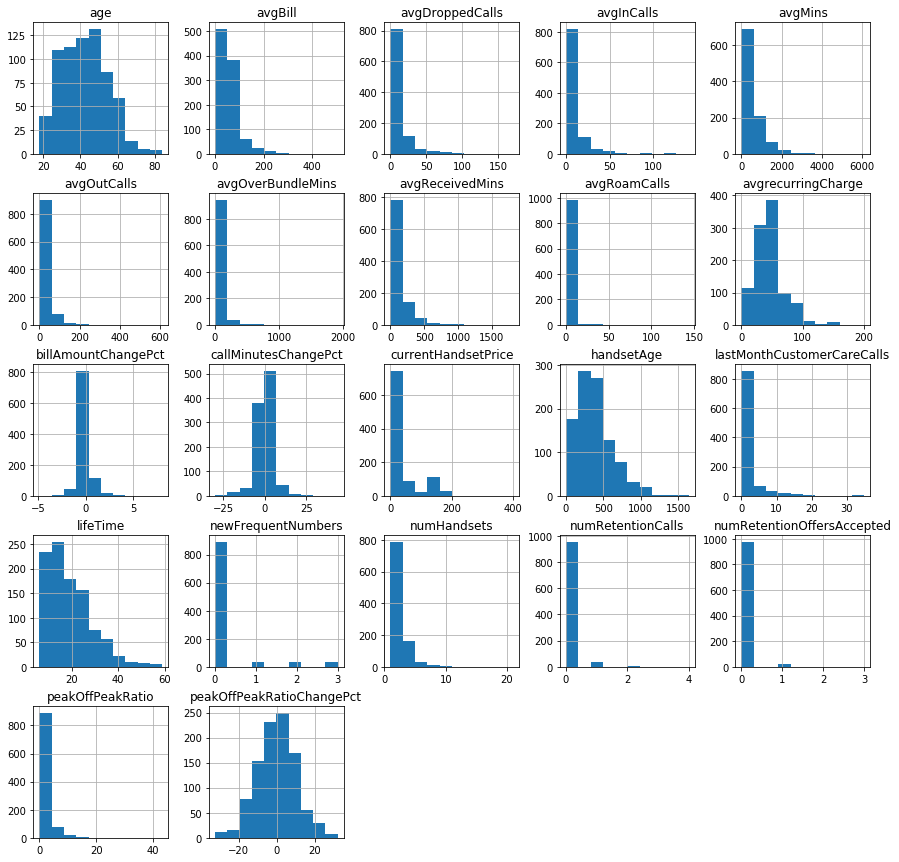

In [93]:
# Plot histograms of the continuous features and save in a PDF file
df_clean[continuous_columns].hist(figsize=(15,15))
plt.savefig('continuous_histograms.pdf')

### Box plots for all the continuous features

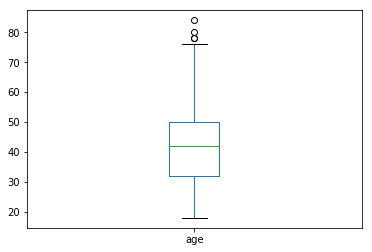

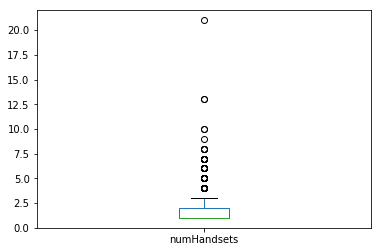

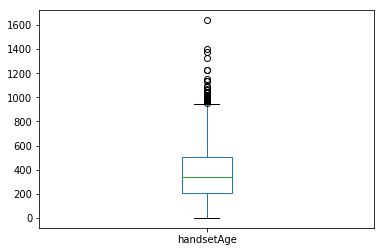

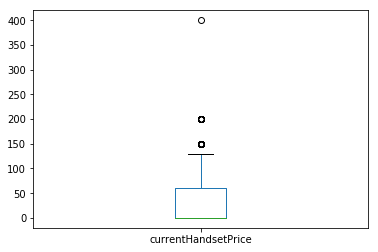

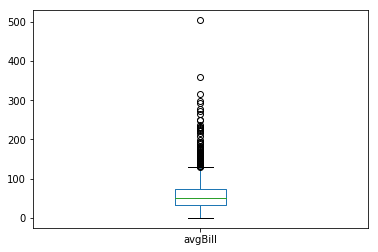

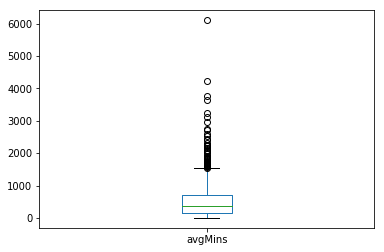

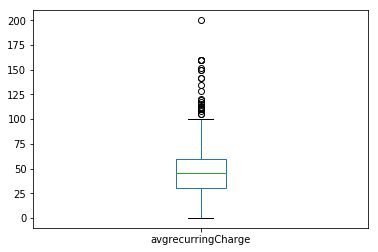

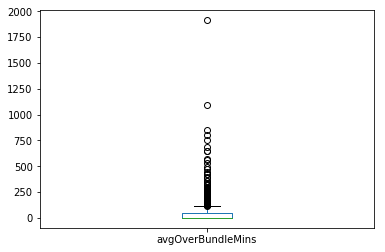

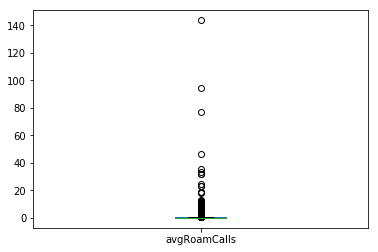

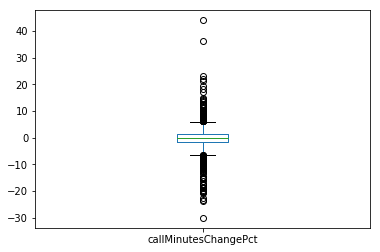

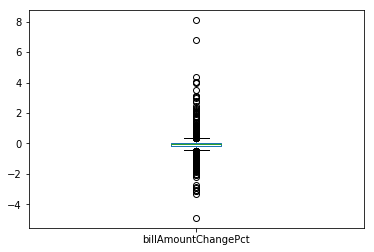

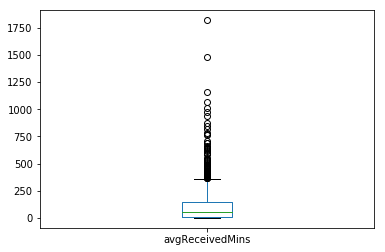

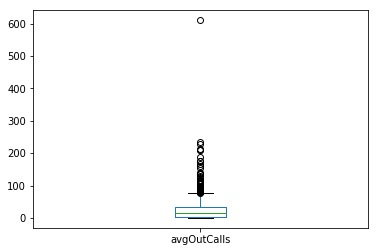

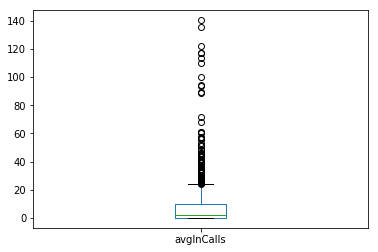

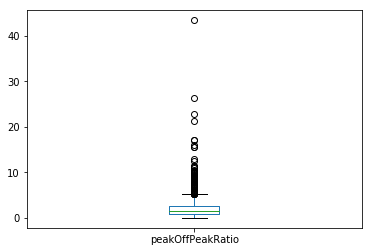

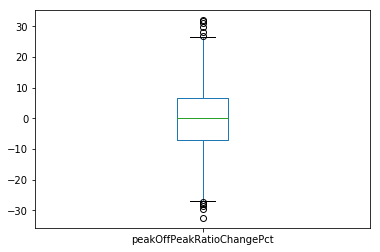

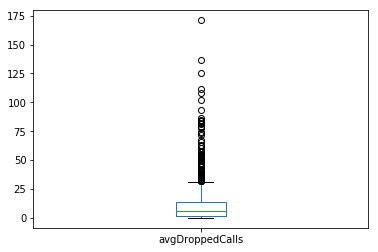

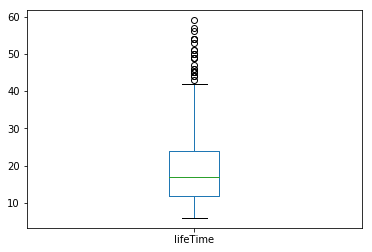

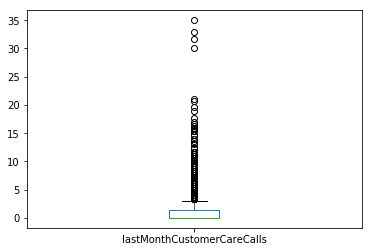

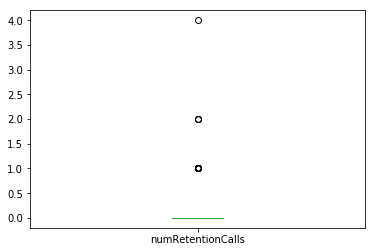

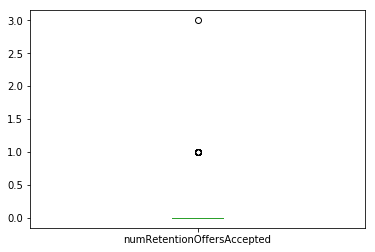

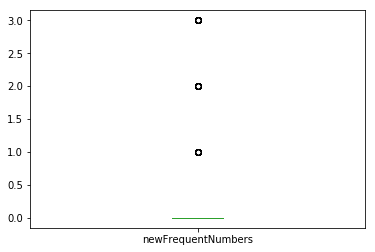

In [94]:
# Plot box plots for all the continuous features and save in a PDF file
pp = PdfPages('continuous_box_plots.pdf')

for col in continuous_columns:
    f = df_clean[col].plot(kind="box")
    # f = sns.boxplot(df[col], orient='v', width=0.2) # use Seaborn if Pandas boxplots not displaying outliers
    pp.savefig(f.get_figure())
    plt.show()

pp.close()

### Bar plots for all the categorical features

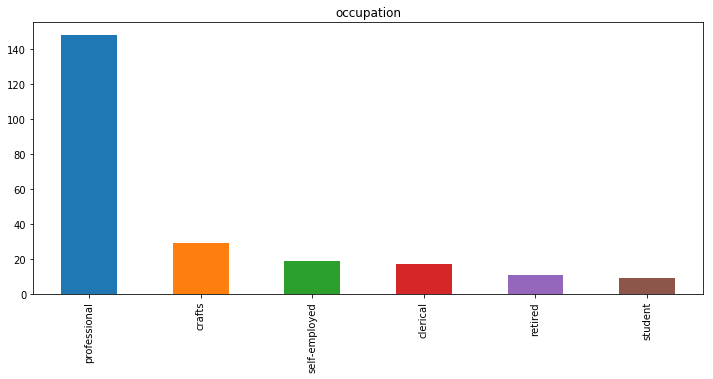

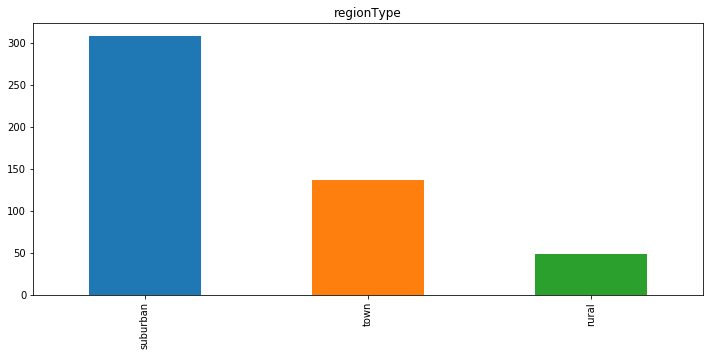

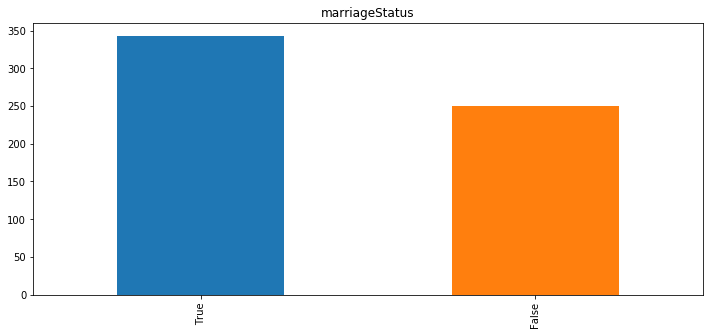

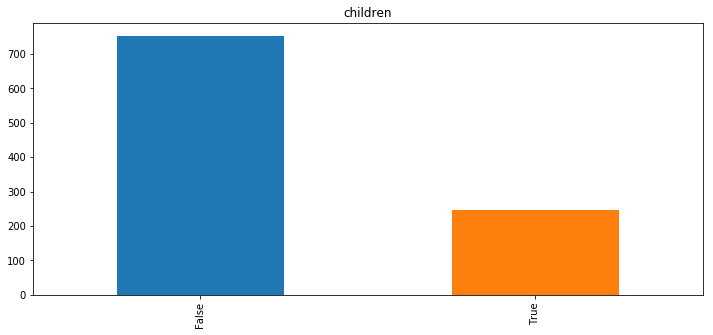

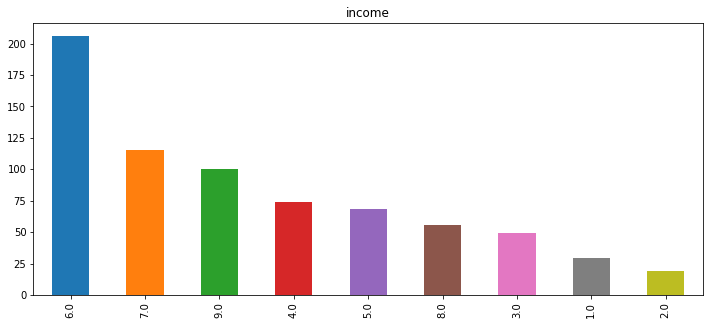

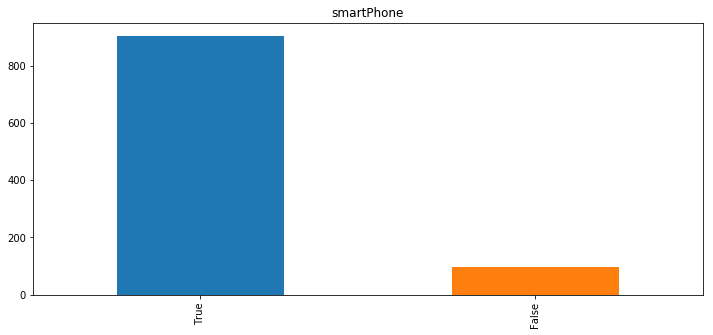

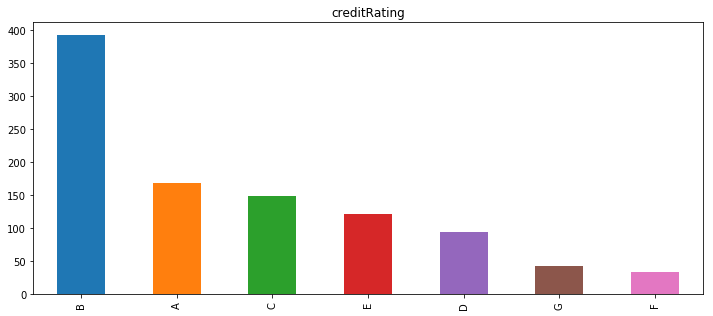

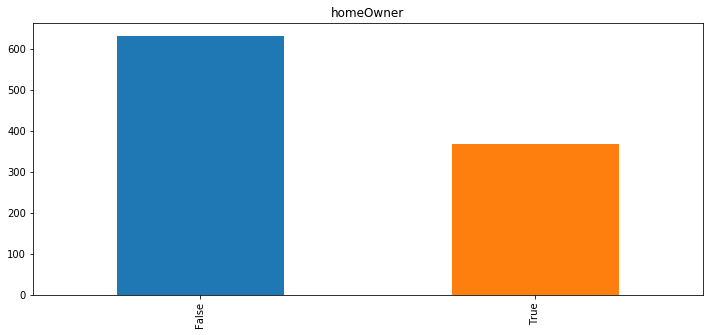

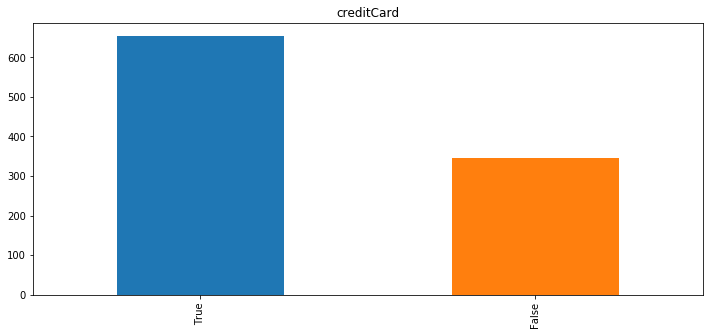

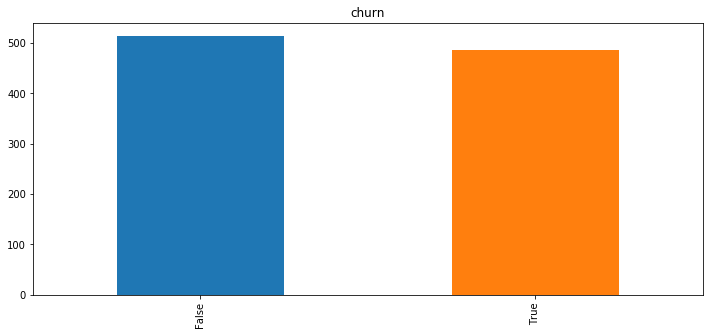

In [95]:
# Plot bar charts for all categorical features (except customer [just ID number]) and save them in a single PDF file
pp = PdfPages('categorical_bar_charts.pdf')

for column in categorical_columns[1:]:
    f = df_clean[column].value_counts().plot(kind='bar', title=column, figsize=(12,5))
    pp.savefig(f.get_figure())
    plt.show()

pp.close()

## Discussion of data quality

### Issues addressed by quality checks and cleaning

- Whitespace: df reloaded with new CSV stripped of terminal whitespaces
- Incorrectly typed categorical data
 - Customer and income columns were converted from numerical to categorical
- Incorrectly typed/named missing data
 - 'unknown' for regionType and marriageStatus were replaced with NaN
 - Zero values for age and income were replaced with NaN
- Irregular cardinality
    - Incorrectly typed/named Boolean data 
     - true, false, t, f, yes and no were converted to True/False for credCard and marriageStatus
     - Note: True/False values should be changed to 0 or 1 before any learning algorithms are applied.
     Different representations of same category values
    - Inconsitently named category levels
     - regionType: s converted suburban and r to rural.
- Invalid data
 - Negative values for handsetAge (2/1000) were replaced with NaN
- Duplicates
 - Duplicate rows: none present
 - Duplicate columns: none present
 - Note: These duplicate checks were done after the above changes to misnamed values, so the inconsistent naming had not caused any irregular cardinality.


### Output
- Cleaned CSV file reflecting above changes
 - Note: Type changes that were not accompnied by value changes (customer and income to categroical)do not get incorporated into CSV files and must be re-applied if needed after a read_csv event.
- Categorical and numerical data quality tables
- This report


### Remaining issues

#### Missing (null) values
*Major*
- 32% of age values missing
- 77% of occupation values missing
- 51% of regionType values missing
- 41% of marriageStatus values missing

All of the above would have the potential for significant corelation with lifestyle, attitudes, economic circumstances, etc.; hence possibly on churn too.

*Minor*
- 0.2% (2/1000) of handsetAge values missing

#### Outliers
- Outliers are present in all the numerical data based on the box plots, but in many have high density at the whisker tips (1.5 x IQR) and then taper off, which suggests they are valid data in a heavy-tailed distribution. In many of these cases, there are also some more some far-flung points; however, almost all seem within reasonable bounds for the variable and are not *that far* from the last clearly valid outlier (< twice its value). The only really suspicious outlier would be that in the avgCallsOut feature, which is > three times the nearest value, but an average 600 min (10 h) of calls in a month is still not unrealistic.

#### Possible uninformative columns
- There are not totally constant columns (cardinality = 1); however numRetentionCalls, numRetentionCallsAccepted and newFrequentNumbers are almost constant, having only 2-3 non-zero values out of 1000.
- Customer feature is just a unique ID, but if assigned in chronological order, it may indicate how long customers have been signed up and this would certainly have potenital as a useful feature. However, this information seems to be already captured in the 'lifetime' feature.

# 2. Data Understanding: data quality plan
<a name='2'></a>

## 2.1 Issues

**The issues we need to address in the quality plan are given in the 'Remaining issues' section of the Data Quality Report (above)**, and just how they are to be addressed is specified and explained in section 2.1 below.

### Outliers
Outliers are present in all the numerical data based on the box plots, but in many have high density at the whisker tips (1.5 x IQR) and then taper off, which suggests they are valid data in a heavy-tailed distribution. In many of these cases, there are also some more some far-flung points; however, almost all seem within reasonable bounds for the variable and are not *that far* from the last clearly valid outlier (< twice its value). The only really suspicious outlier would be that in the avgOutCalls feature, which is > three times the nearest value, but an average 600 min (10 h) of calls in a month is still not unrealistic. In fact the highest for avgReceivedMins is over double this.

Nonetheless, it is worth checking the avgOutCalls and avgReceivedMins maxima. These customers should also be amongst the highest avgMins and proabably also highest avgBill, so this can be used to check the likely validity of the outliers.

In [96]:
# Show customers with 5 highest avgOutCalls
df_clean[df_clean.columns[1:24]].sort_values(by='avgOutCalls', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,...,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls
360,NaN,NaN,NaN,NaN,False,NaN,3,146.0,True,199.99,...,360.33,4220.50,84.99,1095.25,11.28,3.990,1.4030,541.09,610.33,140.33
319,32.0,NaN,NaN,False,False,4.0,2,199.0,True,199.99,...,503.91,6103.75,200.15,1912.50,23.09,3.485,0.8602,1817.74,233.33,23.67
425,32.0,NaN,NaN,False,False,3.0,2,97.0,True,129.99,...,85.37,1756.50,84.99,0.25,0.00,5.590,-0.1426,313.29,229.33,100.00
479,30.0,crafts,NaN,False,False,6.0,2,335.0,True,149.99,...,62.75,1719.50,53.62,45.25,0.00,-11.050,-0.4068,596.39,211.33,113.33
673,30.0,NaN,NaN,False,False,7.0,3,154.0,True,199.99,...,248.54,3765.00,151.68,493.25,6.55,-3.780,-1.8194,1008.51,209.67,39.33


In [97]:
# Show customers with 5 highest avgReceivedMins
df_clean[df_clean.columns[1:24]].sort_values(by='avgReceivedMins', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,...,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls
319,32.0,NaN,NaN,False,False,4.0,2,199.0,True,199.99,...,503.91,6103.75,200.15,1912.50,23.09,3.485,0.8602,1817.74,233.33,23.67
456,NaN,NaN,suburban,False,True,6.0,4,43.0,True,59.99,...,130.72,3254.75,79.99,178.50,0.29,-6.895,-0.8062,1479.38,18.00,3.00
587,24.0,NaN,NaN,False,False,1.0,2,19.0,True,199.99,...,232.30,3633.75,159.99,474.50,0.00,-3.615,-0.6748,1158.76,208.33,25.67
850,30.0,professional,suburban,False,False,7.0,1,661.0,True,0.00,...,162.04,1701.00,74.99,227.50,0.00,-18.820,-1.8160,1063.30,9.00,7.00
673,30.0,NaN,NaN,False,False,7.0,3,154.0,True,199.99,...,248.54,3765.00,151.68,493.25,6.55,-3.780,-1.8194,1008.51,209.67,39.33


In [98]:
# Show customers with 5 highest avgMins
df_clean[df_clean.columns[1:24]].sort_values(by='avgMins', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,...,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls
319,32.0,NaN,NaN,False,False,4.0,2,199.0,True,199.99,...,503.91,6103.75,200.15,1912.50,23.09,3.485,0.8602,1817.74,233.33,23.67
360,NaN,NaN,NaN,NaN,False,NaN,3,146.0,True,199.99,...,360.33,4220.50,84.99,1095.25,11.28,3.990,1.4030,541.09,610.33,140.33
673,30.0,NaN,NaN,False,False,7.0,3,154.0,True,199.99,...,248.54,3765.00,151.68,493.25,6.55,-3.780,-1.8194,1008.51,209.67,39.33
587,24.0,NaN,NaN,False,False,1.0,2,19.0,True,199.99,...,232.30,3633.75,159.99,474.50,0.00,-3.615,-0.6748,1158.76,208.33,25.67
456,NaN,NaN,suburban,False,True,6.0,4,43.0,True,59.99,...,130.72,3254.75,79.99,178.50,0.29,-6.895,-0.8062,1479.38,18.00,3.00


In [99]:
# Show customers with 5 highest avgBill
df_clean[df_clean.columns[1:24]].sort_values(by='avgBill', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,age,occupation,regionType,marriageStatus,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,...,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls
319,32.0,NaN,NaN,False,False,4.0,2,199.0,True,199.99,...,503.91,6103.75,200.15,1912.50,23.09,3.485,0.8602,1817.74,233.33,23.67
360,NaN,NaN,NaN,NaN,False,NaN,3,146.0,True,199.99,...,360.33,4220.50,84.99,1095.25,11.28,3.990,1.4030,541.09,610.33,140.33
936,36.0,NaN,town,True,False,9.0,4,403.0,True,129.99,...,316.55,3113.75,141.87,684.75,4.21,-10.675,-2.9392,585.01,103.67,15.33
263,50.0,professional,NaN,True,True,9.0,3,122.0,True,39.99,...,298.85,1219.50,50.00,804.25,0.00,-23.550,-4.8886,262.87,45.33,2.67
218,42.0,NaN,NaN,NaN,False,5.0,3,199.0,True,129.99,...,292.78,2752.75,84.99,848.75,0.00,22.065,4.0070,816.43,92.00,122.00


**Conclusion:** These are unlikely to be outliers since the top avgOutCalls and avgReceivedMins customers also rank either 1 or 2 fro avgMins and avgBill, i.e. the high values are consistent accross multiple related variables and most likely valid.

## 2.2 Solutions

### Data Quality Plan

| Feature                 | Data Quality Issue   | Handling Strategy            |
|-------------------------|----------------------|------------------------------|
| age                     | Missing values (32%) | Complete-case analysis       |
| occupation              | Missing values (77%) | Drop column                  | 
| regionType              | Missing values (51%) | Drop column                  |
| marriageStatus          | Missing values (41%) | Drop column                  |
| income                  | Missing values (28%) | Impute if < 5% missing after column drops|
|                         |                      | (otherwise, drop column)     |
| handsetAge              | Missing values (0.2%)| Impute using median          |
| All continuous features | Outliers             | Do nothing                   |
| numRetentionCalls       | Almost all same value| Drop column                  |
| numRetentionOffersAccepted| Almost all same value| Drop column                  |
| newFrequentNumbers      | Almost all same value| Drop column                  |
| customer                | Uninformative feature?| Do nothing                  |



#### Missing values
I will drop all columns with over 50% missing values as removing the rows with the value would shrink the sample size and reduce the unrepresentativeness by too great a degree. I will retain the age because the amount missing is more tolerable 32% and it has strong potential as an influence of churn behaviour. All rows without an age value will be removed, because imputation with the mean/median/mode would distort the data too much, by pushing it towards that measure of central tendency and reducing the spread.
marraigeStatus is borderline on staying or going since it is a generally significant socioeconomic factor but has a high % or missing values. This value will get even higher when those with missing ages are removed so I have decided to drop the feature at this stage. This means three potentially significant socioeconomic features will be removed by this plan(also occupation/employment status and degree of urbanization), so after the current round of analysis, it might be a good idea to try another plan that keeps all but occupation (77% missing).
The missing handsetAge values will be imputed as the median of the variable, which should not have too much effect on the sample spread and central tendency, the number of values being very small.

#### Outliers
As discussed previously, all the continuous values beyond 1.5 times the IQR seem to be valid data. The most suspicious values, the avgOutCalls and avgReceivedMins maxima, were checked using related features within the same record and found to be consistent. Therefore, no outliers will be modified.

#### Uninformative features
numRetentionCalls, numRetentionOffersAccepted and newFrequentNumbers are almost constant, having only 2-3 non-zero values out of 1000, so will most likely not inform us about the probability of churn; therefore, they will be dropped. Customer feature is just a unique ID. If assigned in chronological order, it may indicate how long customers have been signed up and this would certainly have potential as a useful feature; however, the number scheme is uncertain and this information seems to be already captured in the 'lifetime' feature. Probably more important though is that this ID allows the records in this dataset to be associated with a particular customer, so keeping it would mean retaining the possibility of linking these records to other data on the customer (and identifying the customer if this is required); therefore, I decided to keep it in this case.


### Implement plan

#### Drop columns

In [100]:
# Drop features
columns = ['occupation', 'regionType', 'marriageStatus', 'numRetentionCalls', 'numRetentionOffersAccepted', 'newFrequentNumbers']
df_clean2 = df_clean.drop(columns, axis=1)
print(df_clean2.shape[1], "columns remaining")
df_clean2.head()

27 columns remaining


,customer,age,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,...,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,churn
0,1029178,56.0,False,6.0,1,684.0,True,0.00,B,False,...,-0.1240,0.82,0.00,0.00,1.534000,-5.800300,2.00,23,0.00,False
1,1066490,58.0,False,6.0,1,345.0,True,0.00,C,False,...,2.7308,395.82,68.00,15.33,2.888239,-3.171997,18.67,11,1.00,True
2,1050736,NaN,False,NaN,1,493.0,True,0.00,G,True,...,-0.9734,63.84,22.67,14.00,0.813333,-7.493694,3.67,17,3.33,False
3,1060762,26.0,False,4.0,3,122.0,True,79.99,B,True,...,-0.2308,30.98,43.33,4.00,0.732926,-3.750551,6.67,12,0.33,True
4,1084909,52.0,False,9.0,1,256.0,True,0.00,E,False,...,0.5698,313.60,75.67,25.67,0.876904,9.809992,10.00,8,6.33,True


#### Drop rows

In [101]:
# Drop rows with missing age
df_clean2.dropna(subset=['age'], how='all', inplace=True)
print(df_clean2.shape[0], "rows remaining")
df_clean2.head()

684 rows remaining


,customer,age,children,income,numHandsets,handsetAge,smartPhone,currentHandsetPrice,creditRating,homeOwner,...,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,churn
0,1029178,56.0,False,6.0,1,684.0,True,0.00,B,False,...,-0.1240,0.82,0.00,0.00,1.534000,-5.800300,2.00,23,0.00,False
1,1066490,58.0,False,6.0,1,345.0,True,0.00,C,False,...,2.7308,395.82,68.00,15.33,2.888239,-3.171997,18.67,11,1.00,True
3,1060762,26.0,False,4.0,3,122.0,True,79.99,B,True,...,-0.2308,30.98,43.33,4.00,0.732926,-3.750551,6.67,12,0.33,True
4,1084909,52.0,False,9.0,1,256.0,True,0.00,E,False,...,0.5698,313.60,75.67,25.67,0.876904,9.809992,10.00,8,6.33,True
6,1000959,40.0,False,9.0,6,341.0,True,9.99,A,False,...,-0.8360,257.34,154.67,51.00,4.086220,-4.163124,74.67,45,1.00,False


#### Impute missing handsetAge

In [102]:
# Replace missing handsetAge values with the median
df_clean2.loc[:, 'handsetAge'].fillna(df_clean['handsetAge'].median(), inplace=True)
print("Remaining null values:", df_clean2['handsetAge'].isnull().sum())

Remaining null values: 0


#### Check number of missing income values after drops

If <5% of total impute these values as mode

In [103]:
count_missing = df_clean2['income'].isnull().sum()
missing_percent = 100 * count_missing / df_clean2.shape[0]
missing_percent

2.6315789473684212

In [104]:
df_clean2.loc[:, 'income'].head()

0    6.0
1    6.0
3    4.0
4    9.0
6    9.0
Name: income, dtype: category
Categories (9, float64): [1.0, 2.0, 3.0, 4.0, ..., 6.0, 7.0, 8.0, 9.0]

#### Impute missing income levels

In [105]:
mode = df_clean['income'].mode()[0]
df_clean2.loc[:, 'income'].fillna(mode, inplace=True)
print("Any remaining null values?\n\n", df_clean2.isnull().sum())

Any remaining null values?

 customer                      0
age                           0
children                      0
income                        0
numHandsets                   0
handsetAge                    0
smartPhone                    0
currentHandsetPrice           0
creditRating                  0
homeOwner                     0
creditCard                    0
avgBill                       0
avgMins                       0
avgrecurringCharge            0
avgOverBundleMins             0
avgRoamCalls                  0
callMinutesChangePct          0
billAmountChangePct           0
avgReceivedMins               0
avgOutCalls                   0
avgInCalls                    0
peakOffPeakRatio              0
peakOffPeakRatioChangePct     0
avgDroppedCalls               0
lifeTime                      0
lastMonthCustomerCareCalls    0
churn                         0
dtype: int64


### Create new (second) cleaned CSV

In [106]:
df_clean2.to_csv('CustomerChurn-1437330_post_quality_plan.csv', index=False)

# 3. Data Understanding: Relationships between feature pairs
<a name='3'></a>

### Get latest clean (post-quality-plan) data
Also re-convert mistyped categorical features, including approriate ordered catetogories

In [107]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
df_clean2 = pd.read_csv('CustomerChurn-1437330_post_quality_plan.csv')

# Convert non-continuous numeric features to categorical
df_clean2['customer'] = df_clean2['customer'].astype('category')
df_clean2['income'] = pd.Series(pd.Categorical(df_clean2['income'], categories=[int(i) for i in range(1,10)], ordered=True))
       
# Convert object-type features to categorical
df_clean2['creditRating'] = pd.Series(pd.Categorical(df_clean2['creditRating'], ordered=True))

## 3.1 Continuous features

### Correlations for continuous features (interactions)

Below is a correlation matrix for most of continuous features; the few remaining features were considered to have less potential for interactions. These correlations are assessed in order to find rendundant features which could be combined or removed for the purpose of dimensionality reduction; there association with the target feature churn is not being looked at here.

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5]),
 <a list of 15 Text xticklabel objects>)

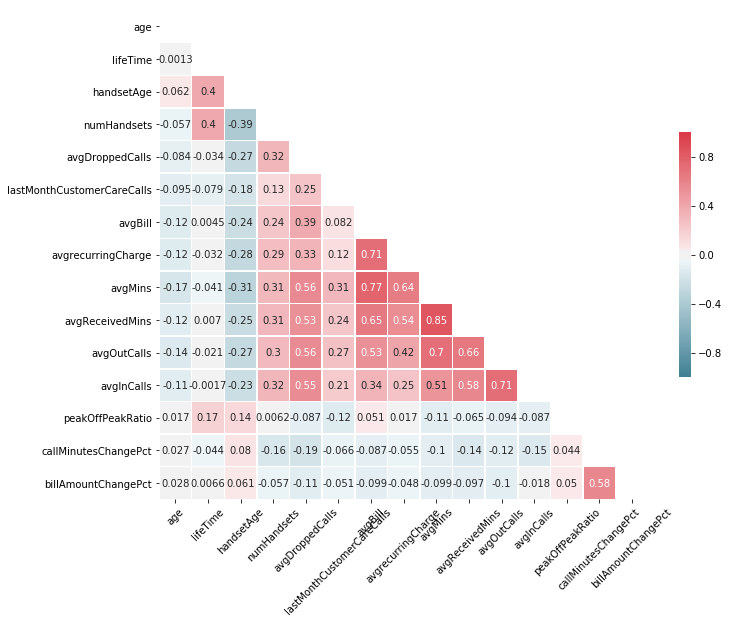

In [108]:
# Select columns containing continuous data
continuous_features = df_clean2[['age', 'lifeTime', 'handsetAge', 'numHandsets', 'avgDroppedCalls', 'lastMonthCustomerCareCalls', 'avgBill', 'avgrecurringCharge', 'avgMins','avgReceivedMins','avgOutCalls','avgInCalls', 'peakOffPeakRatio', 'callMinutesChangePct', 'billAmountChangePct']].columns

# Calculate correlation of all pairs of continuous features
corr = df_clean2[continuous_features].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

### Pair-wise plots of interacting features

The following cells show regression plots for pairs of continuous features which have been shown to have a strong correlation on the matrix above; in this case, I've limited the plots to correlations above 0.7. This may indicate that some of these features are redundant, and thus would be candidates for dimensionality reduction.

Note: Shaded region represents confidence interval for the regression estimate.

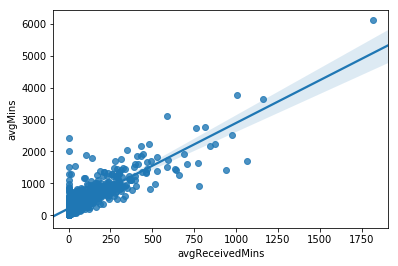

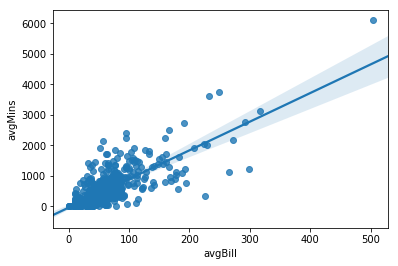

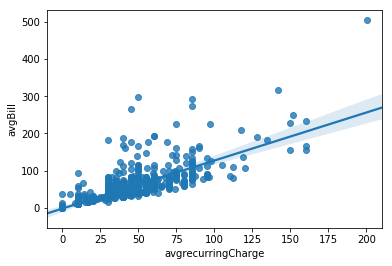

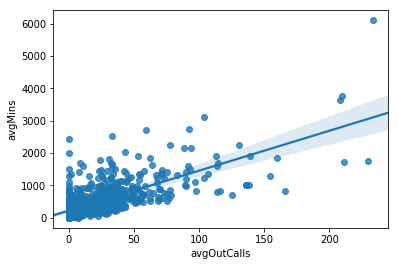

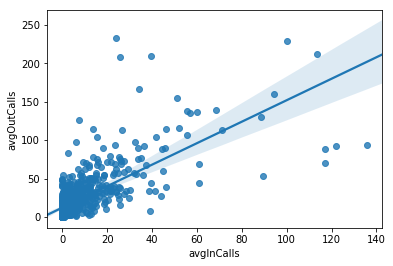

In [109]:
sns.regplot(x=df_clean2["avgReceivedMins"], y=df_clean2["avgMins"])
plt.show()

sns.regplot(x=df_clean2["avgBill"], y=df_clean2["avgMins"])
plt.show()

sns.regplot(x=df_clean2["avgrecurringCharge"], y=df_clean2["avgBill"])
plt.show()

sns.regplot(x=df_clean2["avgOutCalls"], y=df_clean2["avgMins"])
plt.show()

sns.regplot(x=df_clean2["avgInCalls"], y=df_clean2["avgOutCalls"])
plt.show()



###  Continuous Variables in relation to churn

Box plots for each of the continuous variables grouped by churn status (true/false).

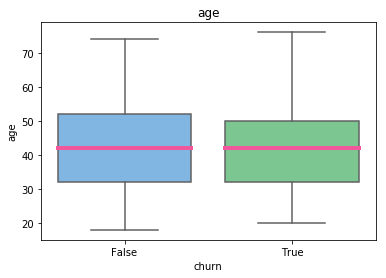

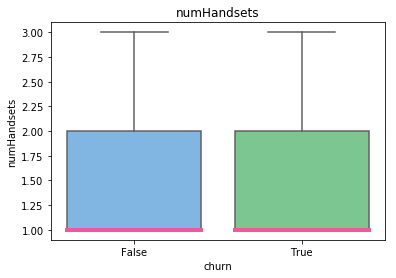

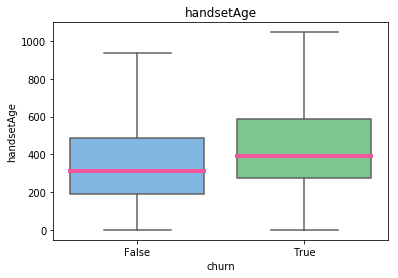

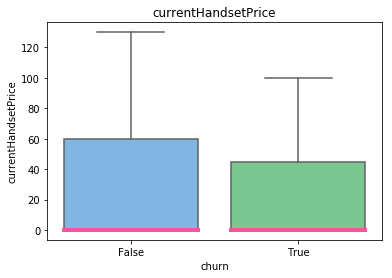

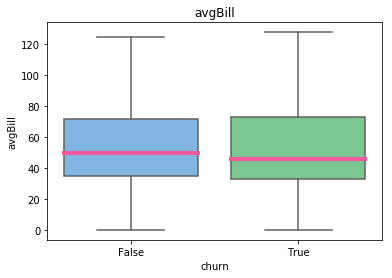

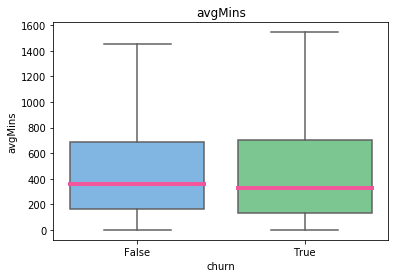

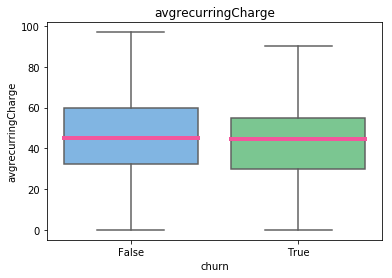

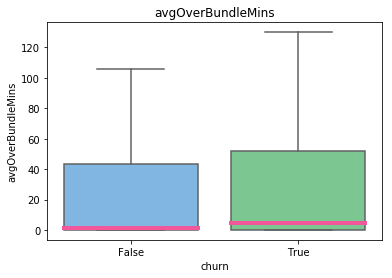

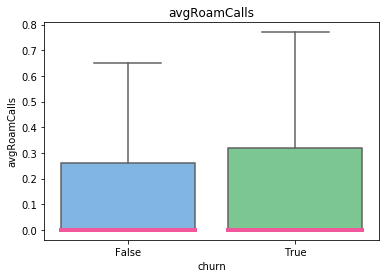

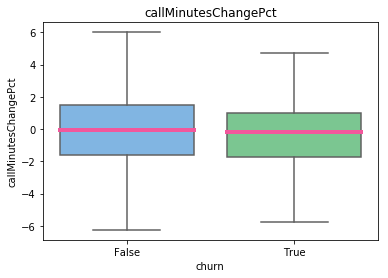

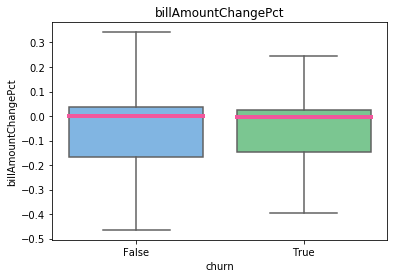

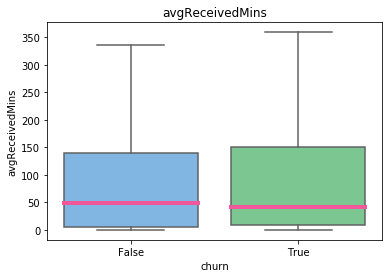

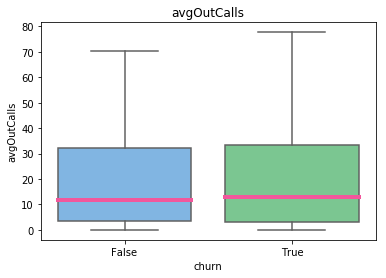

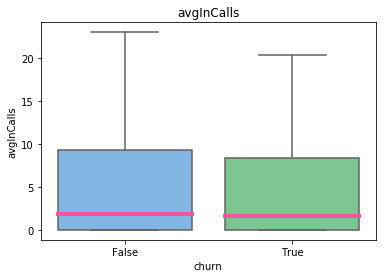

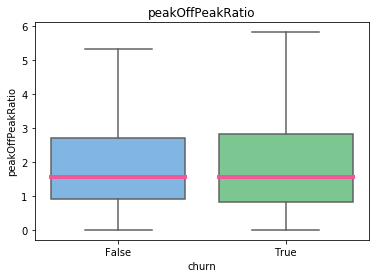

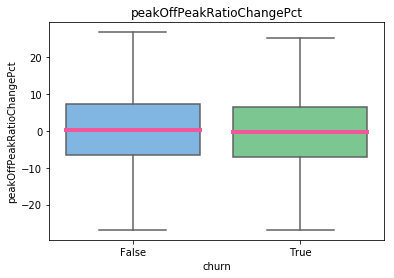

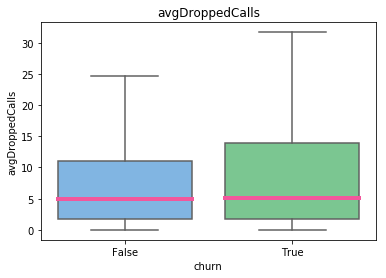

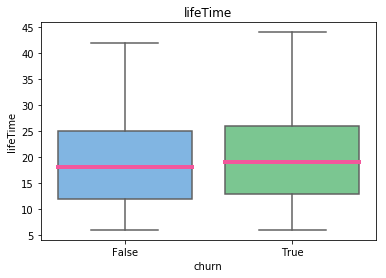

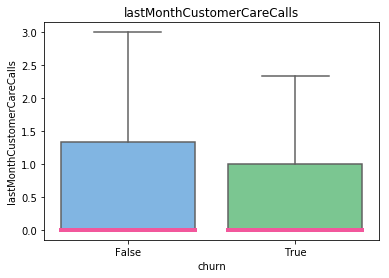

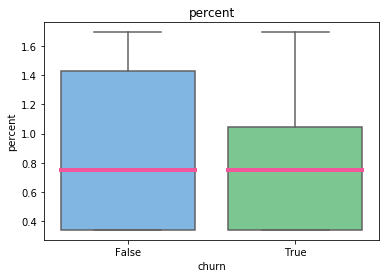

In [116]:
continuous_features = df_clean2.select_dtypes(['int64', 'float64'])

for col in continuous_features:
    medianprops = dict(linestyle='-', linewidth=4, color='#f2579c')
    sns.boxplot(x="churn", y=col, data=df_clean2, medianprops=medianprops, palette=['#71b6f2', '#6ed38c'], showfliers=False) # delete showfliers=False to include outlires
    plt.title(col)
    plt.show()

## 3.3 Categorical-categorical feature plots

Here all the categorical features are examined realtion to the churn status of the customer. **Note that the stacked charts used for the ordinal features can take a while to generate (browser tab icon will change to hour glass to indicate processing)** 

### Function to plot stacked bar chart

In [119]:
def stacked_cat_churn(df, category):
    """
    Groups the categorical feature by level and the churn status of the customers and
    then plots a stacked bar chart showing the percentage churn/no-chuurn for each level of the feature
    
    Note that the stacked charts used can take a while to generate
    browser tab icon will change to hour glass to indicate processing)
    """
    # Insert a new column called 'percent' and fill it with 0s
    df['percent'] = 0

    for level in df[category]:
        count = 1 / df[df[category] == level].count()['churn']
        index_list = df[df[category] == level].index.tolist()
        for i in index_list:
            df.loc[i, 'percent'] = count * 100

    # Group categorical columns by churn and sum for each of the two levels (True and False)
    group = df[['percent',category, 'churn']].groupby([category, 'churn']).sum()

    # Plot values of view in a bar chart
    colors = ['#71b6f2', '#6ed38c'] * categorical_columns.size
    group_plot = group.unstack().plot(kind='bar', stacked=True, color=colors, title="Churn accross {} levels".format(category), figsize=(10,6))

    # Define label colours and text and add to the plot
    green_patch = mpatches.Patch(color='#6ed38c', label='Churn')
    blue_patch = mpatches.Patch(color='#71b6f2', label='No Churn')
    group_plot.legend(handles=[green_patch, blue_patch], frameon = True)

    # Define y labels
    group_plot.set_ylabel("Percentage")
    group_plot.set_ylim([0,100])

### Ordinal categorical features

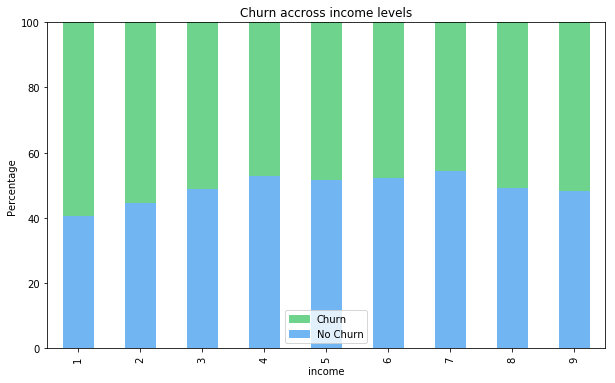

In [120]:
# Income
stacked_cat_churn(df_clean2, 'income')

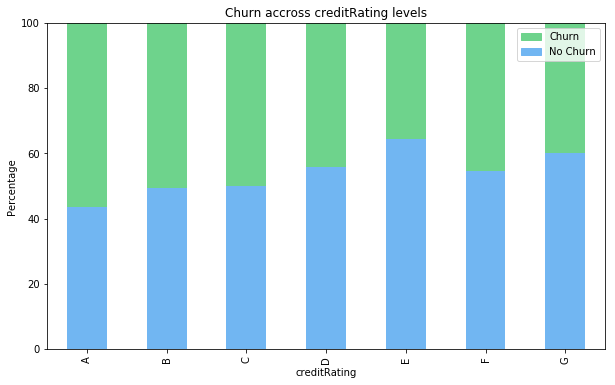

In [121]:
# Credit rating
stacked_cat_churn(df_clean2, 'creditRating')

### Boolean features

This correlation matrix shows correlations between the boolean features, **including the coorelations with churn**.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5]), <a list of 5 Text xticklabel objects>)

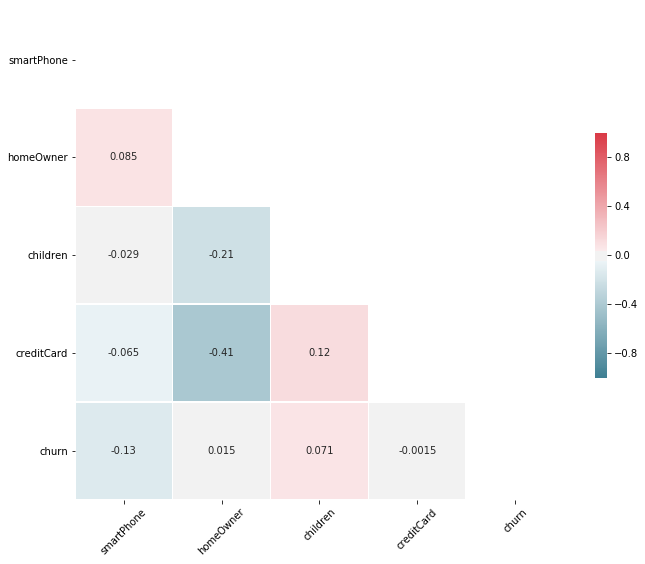

In [114]:
# Select columns containing categorical data
boolean_features = ['smartPhone', 'homeOwner', 'children', 'creditCard', 'churn']

# Calculate correlation of all pairs of continuous features
corr = df_clean2[boolean_features].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

## 3.4 Discussion

### Feature interactions
Given that avgMins is strongly correlated with both avgReceivedMins and avgBill(clearer when omit maximal point; shown below), the latter two features may not be needed in the final analysis (dimensionality reduction). A number of other continuous features relating call time and charges were also quite strongly correlated (correlation coefficient, ~0.7).

### Associations between features and churn

#### Continuous features
Churn does not seem to be related to any of the continuous features, including age, which I thought might be an influence. Handset age is associated with a noticeably higher churn median but the difference is well within the IQR of the no-churn values and very unlikely to be statistically significant.

#### Ordinal categorical features
Financial security, as represented by income and credit rating, seems to have a negative relationship to churn. For both features, the no-churn % (blue bars) exhibits an almost constant rise to a maximum in the upper middle of their range: up ~10% for income level 7 and ~20% for credit rating E. This observation could be at least partially explained if less financially secure customers were more concerned about saving money on the scale of a mobile phone bill than their more secure counterparts, and hence they would be more likely to take offers of savings from competitors. For well-off customers, the level of savings offered by competitors may not be adequate incentive to switch when balanced against the time and effort involved. Having said that, no-churn % declines a little for the highest two or three levels/ratings (i.e. churn increases relative to the upper-middle levels), so this might be interesting to investigate further. The decline is small though, and the no-churn % is still higher here than at the lowest levels/ratings.

#### Binary (Boolean) categorical features
Correlations between all Boolean features and churn were very small (max -0.13 for smart phone ownership) so these features are unlikely to be predictors of churn. There is a moderate negative correlation between credit card ownership and home ownership, which is interesting but unrelated to churn.

### Conclusion
First, the continuous features show some scope for dimensionality reduction, particularly those correlated to avgMins.
Second, the only usable features with substantial enough relationships to churn were income and credit rating, so these and related financial features could be explored further and tested as predictors of churn.
Finally, some potentially important socioeconomic factors such as employment, urbanization and marital status were omitted due to missing values: these should be revisited when more data is available. 

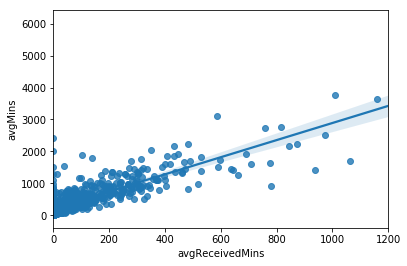

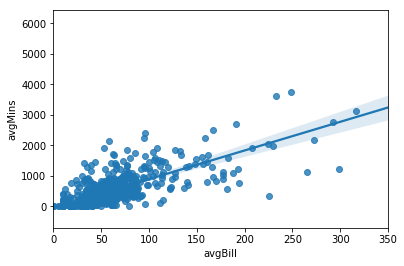

In [115]:
sns.regplot(x=df_clean2["avgReceivedMins"], y=df_clean2["avgMins"])
plt.xlim([0,1200])
plt.show()

sns.regplot(x=df_clean2["avgBill"], y=df_clean2["avgMins"])
plt.xlim([0,350])
plt.show()